In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\Aashish\AppData\Local\Temp\ipykernel_14448\1871975127.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


[]

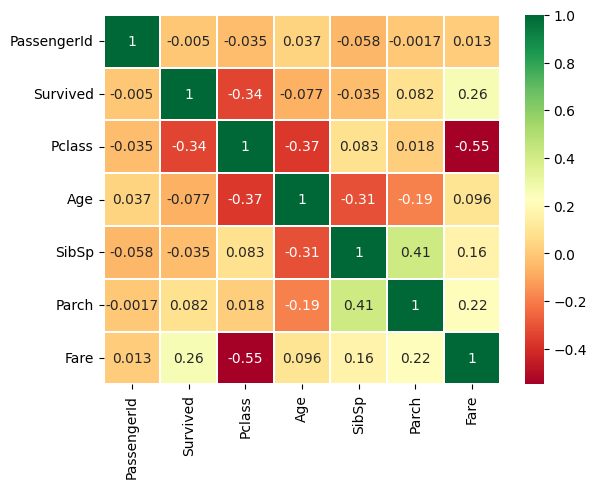

In [4]:
#  look corelation across all features
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.plot()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Figure size 2000x2000 with 0 Axes>

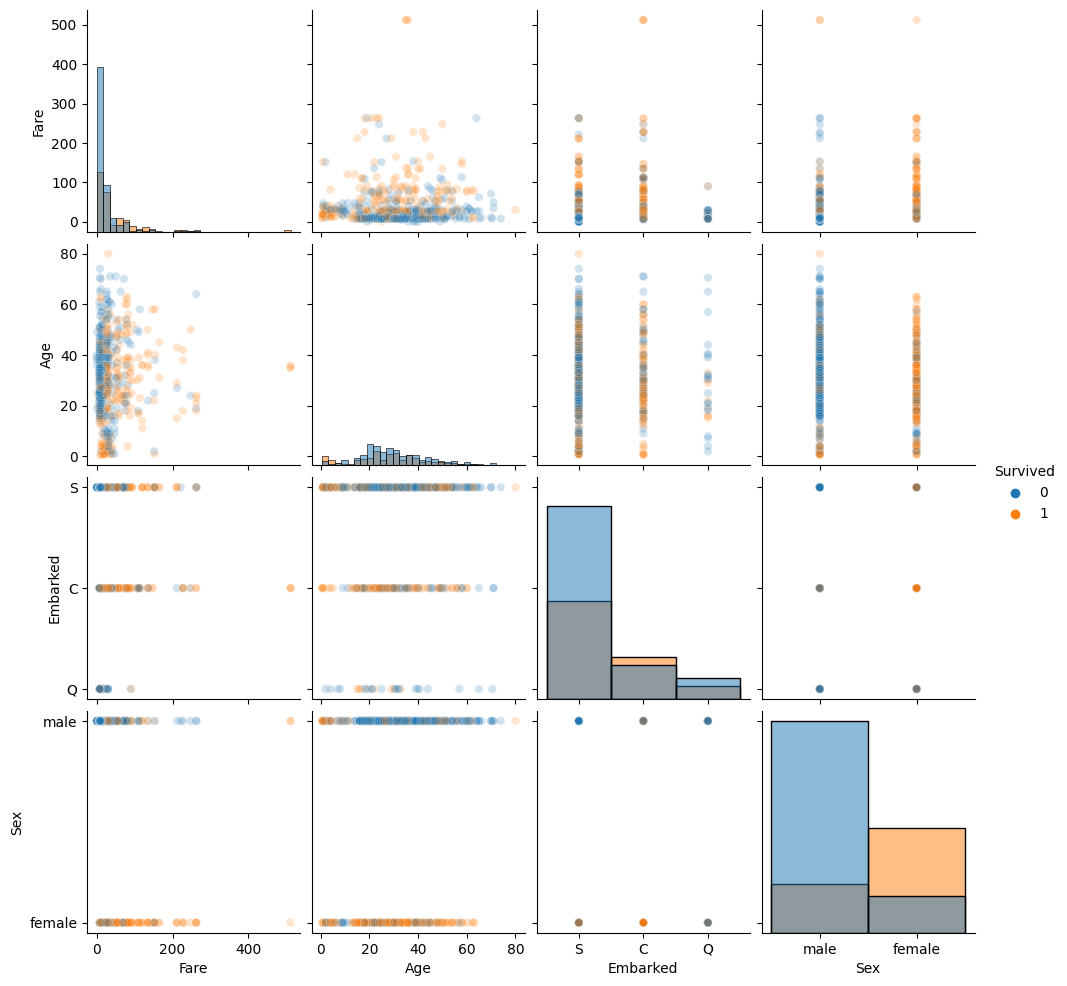

In [6]:
plt.figure(figsize=(20,20))
columns=["Fare", "Age", "Embarked", "Sex"]
sns.pairplot(data=df,vars=columns,hue="Survived",diag_kind="hist",diag_kws={"bins":30},plot_kws={"alpha":0.2})

Text(0.5, 1.0, 'Number of samples per class present in the target')

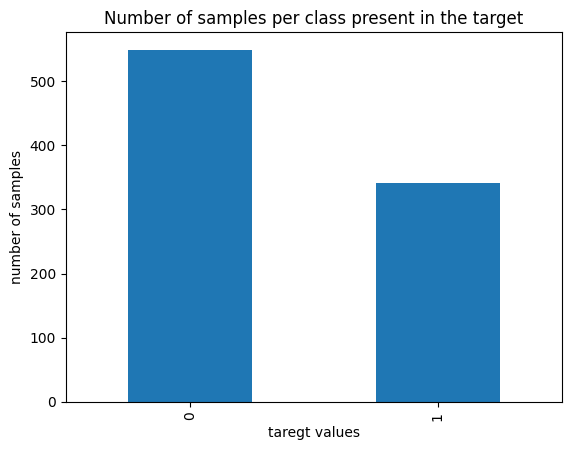

In [7]:
df["Survived"].value_counts().plot.bar()
plt.ylabel("number of samples")
plt.xlabel("taregt values")
plt.title("Number of samples per class present in the target")

In [8]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Text(0, 0.5, 'percentage of missing value')

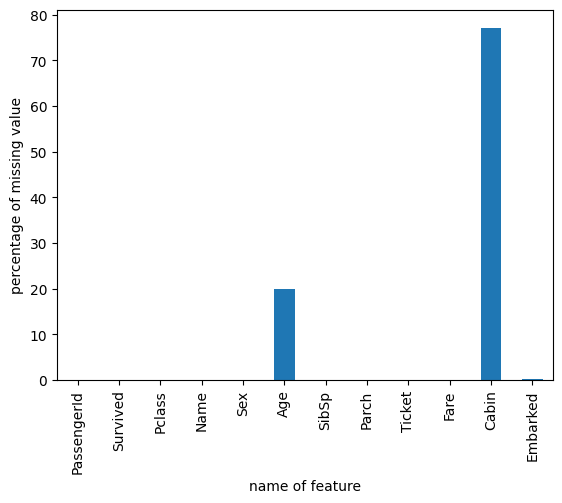

In [9]:
(df.isnull().mean()*100).plot.bar()
plt.xlabel("name of feature")
plt.ylabel("percentage of missing value")

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
avg_age=df["Age"].mean().round()

In [12]:
avg_age


30.0

In [13]:
df.drop(columns="Cabin",inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
target_column = "Survived"
numerical_columns = ["Age", "Fare", "SibSp", "Parch"]
categorical_columns = ["Pclass","Sex","Embarked"]

In [16]:
all_features=numerical_columns+categorical_columns
all_=numerical_columns+categorical_columns+[target_column]

In [17]:
all_

['Age', 'Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Embarked', 'Survived']

In [18]:
# tarinig data
train_data=df[all_]
train_data=train_data[train_data["Embarked"].notna()]
train_data=train_data.fillna(0)

In [19]:
train_data.head()

,Age,Fare,SibSp,Parch,Pclass,Sex,Embarked,Survived
0,22.0,7.2500,1,0,3,male,S,0
1,38.0,71.2833,1,0,1,female,C,1
2,26.0,7.9250,0,0,3,female,S,1
3,35.0,53.1000,1,0,1,female,S,1
4,35.0,8.0500,0,0,3,male,S,0


In [20]:
train_data.isnull().sum()

Age         0
Fare        0
SibSp       0
Parch       0
Pclass      0
Sex         0
Embarked    0
Survived    0
dtype: int64

In [21]:
#features 
train_features=train_data[all_features]

In [22]:
train_features.head()

,Age,Fare,SibSp,Parch,Pclass,Sex,Embarked
0,22.0,7.2500,1,0,3,male,S
1,38.0,71.2833,1,0,1,female,C
2,26.0,7.9250,0,0,3,female,S
3,35.0,53.1000,1,0,1,female,S
4,35.0,8.0500,0,0,3,male,S


In [23]:
train_features.isnull().sum()

Age         0
Fare        0
SibSp       0
Parch       0
Pclass      0
Sex         0
Embarked    0
dtype: int64

In [24]:
train_target=train_data[target_column]

In [25]:
train_target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [26]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [27]:
cp=OneHotEncoder(handle_unknown="ignore")
numpr=StandardScaler()


In [28]:
from sklearn.compose import ColumnTransformer

In [29]:
preprocessor=ColumnTransformer([('one-hot_enc',cp,categorical_columns),('standard-scler',numpr,numerical_columns)])

In [30]:
#  spliting the data set

from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(train_features,train_target,random_state=1,shuffle=True,test_size=0.2)

In [42]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,balanced_accuracy_score,confusion_matrix

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [44]:
lg=Pipeline([("preprocessor",preprocessor),("classifier",LogisticRegression())])

In [36]:
lg.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot_enc',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('standard-scler',
                                                  StandardScaler(),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch'])])),
                ('classifier', LogisticRegression())])

In [37]:
pred=lg.predict(x_test)

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

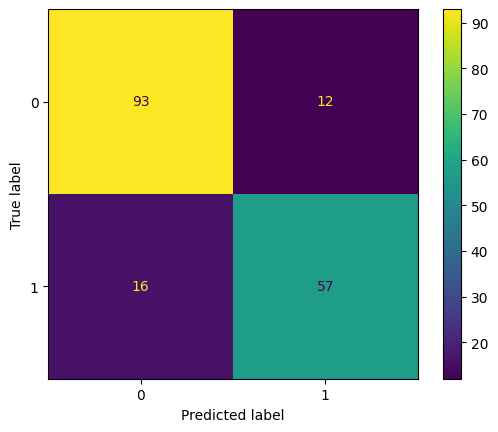

In [41]:
ConfusionMatrixDisplay.from_estimator(lg,x_test,y_test)

In [45]:
accuracy_score(y_test,pred)

0.8426966292134831

In [46]:
balanced_accuracy_score(y_test,pred)

0.8332681017612524

In [50]:
pr=precision_score(y_test,pred)
pr

0.8260869565217391

In [51]:
rc=recall_score(y_test,pred)
rc

0.7808219178082192

In [52]:
2*(pr*rc)/(pr+rc)

0.8028169014084506